In [1]:
import pandas as pd
from matplotlib import pyplot as plt
import numpy as np
%matplotlib inline

In [2]:
#read the data 
df =pd.read_csv('Telco-Customer-Churn.csv')
df.sample(5)

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
1914,5356-CSVSQ,Female,0,No,No,3,Yes,Yes,DSL,No,...,No,Yes,Yes,No,Month-to-month,No,Electronic check,64.60,174.2,No
808,4289-DTDKW,Male,0,Yes,No,40,Yes,Yes,Fiber optic,No,...,No,No,Yes,Yes,Month-to-month,Yes,Electronic check,101.30,4113.1,Yes
6428,2079-FBMZK,Female,0,No,No,6,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Mailed check,69.25,418.4,Yes
5797,1169-WCVAK,Male,0,Yes,No,19,Yes,Yes,Fiber optic,Yes,...,No,Yes,No,No,Month-to-month,Yes,Credit card (automatic),88.80,1672.35,No
3838,7714-YXSMB,Female,0,No,No,26,Yes,Yes,Fiber optic,No,...,Yes,No,Yes,Yes,Month-to-month,Yes,Bank transfer (automatic),100.50,2599.95,No


In [3]:
#drop the id column 
#Reason in thia machine learning problem the customer id is useless
df.drop('customerID',axis='columns', inplace =True)
df.dtypes

gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges         object
Churn                object
dtype: object

In [4]:
#look at the MonthlyCharges and Totalcharges it is suppose to be the same. 
#the Totalcharges is seen here as a string
df.TotalCharges.values, df.MonthlyCharges.values

(array(['29.85', '1889.5', '108.15', ..., '346.45', '306.6', '6844.5'],
       dtype=object),
 array([ 29.85,  56.95,  53.85, ...,  29.6 ,  74.4 , 105.65]))

In [6]:
pd.to_numeric(df.TotalCharges, errors='coerce').isnull()

0       False
1       False
2       False
3       False
4       False
        ...  
7038    False
7039    False
7040    False
7041    False
7042    False
Name: TotalCharges, Length: 7043, dtype: bool

In [7]:
df[pd.to_numeric(df.TotalCharges, errors='coerce').isnull()]

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
488,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,No,Yes,Yes,Yes,No,Two year,Yes,Bank transfer (automatic),52.55,,No
753,Male,0,No,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.25,,No
936,Female,0,Yes,Yes,0,Yes,No,DSL,Yes,Yes,Yes,No,Yes,Yes,Two year,No,Mailed check,80.85,,No
1082,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.75,,No
1340,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,Yes,Yes,Yes,Yes,No,Two year,No,Credit card (automatic),56.05,,No
3331,Male,0,Yes,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,19.85,,No
3826,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.35,,No
4380,Female,0,Yes,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.00,,No
5218,Male,0,Yes,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,One year,Yes,Mailed check,19.70,,No
6670,Female,0,Yes,Yes,0,Yes,Yes,DSL,No,Yes,Yes,Yes,Yes,No,Two year,No,Mailed check,73.35,,No


In [8]:
#It is just 11 rows. 
#Should we drop it? First check the length of the data, if the number isnt significant then drop
df.shape

(7043, 20)

In [9]:
#drop the null values 
# do this by choosing the columns that dosen't have empty Total values 
dfN = df[df.TotalCharges != ' ']
dfN.shape

(7032, 20)

In [10]:
#change the values to numeric -Again
dfN.TotalCharges= pd.to_numeric(dfN.TotalCharges)
dfN.dtypes

/Users/emeka/opt/anaconda3/lib/python3.8/site-packages/pandas/core/generic.py:5516: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[name] = value


gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges        float64
Churn                object
dtype: object

In [11]:
dfN[dfN.Churn=='No']

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,No
3,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
6,Male,0,No,Yes,22,Yes,Yes,Fiber optic,No,Yes,No,No,Yes,No,Month-to-month,Yes,Credit card (automatic),89.10,1949.40,No
7,Female,0,No,No,10,No,No phone service,DSL,Yes,No,No,No,No,No,Month-to-month,No,Mailed check,29.75,301.90,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7037,Female,0,No,No,72,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,Yes,Bank transfer (automatic),21.15,1419.40,No
7038,Male,0,Yes,Yes,24,Yes,Yes,DSL,Yes,No,Yes,Yes,Yes,Yes,One year,Yes,Mailed check,84.80,1990.50,No
7039,Female,0,Yes,Yes,72,Yes,Yes,Fiber optic,No,Yes,Yes,No,Yes,Yes,One year,Yes,Credit card (automatic),103.20,7362.90,No
7040,Female,0,Yes,Yes,11,No,No phone service,DSL,Yes,No,No,No,No,No,Month-to-month,Yes,Electronic check,29.60,346.45,No


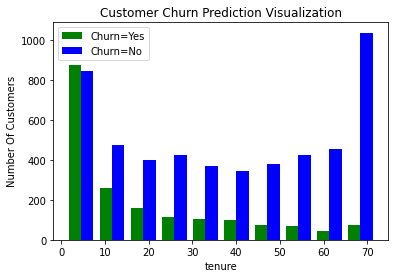

In [12]:
#Visualize the ternure for churn and no churn 
tenure_churn_no = dfN[dfN.Churn == 'No'].tenure
tenure_churn_yes = dfN[dfN.Churn == 'Yes'].tenure
plt.ylabel('Number Of Customers')
plt.xlabel('tenure')
plt.title('Customer Churn Prediction Visualization')
plt.hist([tenure_churn_yes, tenure_churn_no], color = ['green','blue'], label= ['Churn=Yes','Churn=No'])
plt.legend()

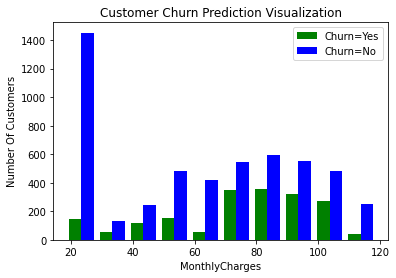

In [13]:
# Do the same for Monthly charges
#Visualize the ternure for churn and no churn 
mc_churn_no = dfN[dfN.Churn == 'No'].MonthlyCharges
mc_churn_yes = dfN[dfN.Churn == 'Yes'].MonthlyCharges
plt.ylabel('Number Of Customers')
plt.xlabel('MonthlyCharges')
plt.title('Customer Churn Prediction Visualization')
plt.hist([mc_churn_yes, mc_churn_no], color = ['green','blue'], label= ['Churn=Yes','Churn=No'])
plt.legend()

In [14]:
def print_unique_values(df):
    '''
    This function returns the categorical values of all categorical variables
    '''
    for column in df:
        if df[column].dtypes == 'object':
            print(f'{column}:{df[column].unique()}')
def print_unique_all_values(df):
    '''
    This function returns the unique values of all thedataset
    '''
    for column in df:
        print(f'{column}:{df[column].unique()}')

In [15]:
#View the cateegorical variabels in the New df created. 
print_unique_values(dfN)

gender:['Female' 'Male']
Partner:['Yes' 'No']
Dependents:['No' 'Yes']
PhoneService:['No' 'Yes']
MultipleLines:['No phone service' 'No' 'Yes']
InternetService:['DSL' 'Fiber optic' 'No']
OnlineSecurity:['No' 'Yes' 'No internet service']
OnlineBackup:['Yes' 'No' 'No internet service']
DeviceProtection:['No' 'Yes' 'No internet service']
TechSupport:['No' 'Yes' 'No internet service']
StreamingTV:['No' 'Yes' 'No internet service']
StreamingMovies:['No' 'Yes' 'No internet service']
Contract:['Month-to-month' 'One year' 'Two year']
PaperlessBilling:['Yes' 'No']
PaymentMethod:['Electronic check' 'Mailed check' 'Bank transfer (automatic)'
 'Credit card (automatic)']
Churn:['No' 'Yes']


In [16]:
#replace the No internet service in OnlineBackup, Techsupport,StreamingMovies
dfN.replace('No internet service', 'No', inplace=True)
dfN.replace('No phone service', 'No', inplace=True)

/Users/emeka/opt/anaconda3/lib/python3.8/site-packages/pandas/core/frame.py:5238: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().replace(


In [17]:
print_unique_values(dfN)

gender:['Female' 'Male']
Partner:['Yes' 'No']
Dependents:['No' 'Yes']
PhoneService:['No' 'Yes']
MultipleLines:['No' 'Yes']
InternetService:['DSL' 'Fiber optic' 'No']
OnlineSecurity:['No' 'Yes']
OnlineBackup:['Yes' 'No']
DeviceProtection:['No' 'Yes']
TechSupport:['No' 'Yes']
StreamingTV:['No' 'Yes']
StreamingMovies:['No' 'Yes']
Contract:['Month-to-month' 'One year' 'Two year']
PaperlessBilling:['Yes' 'No']
PaymentMethod:['Electronic check' 'Mailed check' 'Bank transfer (automatic)'
 'Credit card (automatic)']
Churn:['No' 'Yes']


In [18]:
yes_no_colums =['Partner','Dependents','PhoneService','MultipleLines',
      'OnlineSecurity','OnlineBackup','DeviceProtection','TechSupport','StreamingTV',
     'StreamingMovies','PaperlessBilling','Churn']
for col in yes_no_colums:
    dfN[col].replace({'Yes':1,'No':0}, inplace =True)

/Users/emeka/opt/anaconda3/lib/python3.8/site-packages/pandas/core/generic.py:6619: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return self._update_inplace(result)


In [19]:
#observe there isn't yes and no any more. 
print_unique_all_values(dfN)

gender:['Female' 'Male']
SeniorCitizen:[0 1]
Partner:[1 0]
Dependents:[0 1]
tenure:[ 1 34  2 45  8 22 10 28 62 13 16 58 49 25 69 52 71 21 12 30 47 72 17 27
  5 46 11 70 63 43 15 60 18 66  9  3 31 50 64 56  7 42 35 48 29 65 38 68
 32 55 37 36 41  6  4 33 67 23 57 61 14 20 53 40 59 24 44 19 54 51 26 39]
PhoneService:[0 1]
MultipleLines:[0 1]
InternetService:['DSL' 'Fiber optic' 'No']
OnlineSecurity:[0 1]
OnlineBackup:[1 0]
DeviceProtection:[0 1]
TechSupport:[0 1]
StreamingTV:[0 1]
StreamingMovies:[0 1]
Contract:['Month-to-month' 'One year' 'Two year']
PaperlessBilling:[1 0]
PaymentMethod:['Electronic check' 'Mailed check' 'Bank transfer (automatic)'
 'Credit card (automatic)']
MonthlyCharges:[29.85 56.95 53.85 ... 63.1  44.2  78.7 ]
TotalCharges:[  29.85 1889.5   108.15 ...  346.45  306.6  6844.5 ]
Churn:[0 1]


In [20]:
dfN['gender'].replace({'Female':1,'Male':0},inplace =True)


In [21]:

dfN2=pd.get_dummies(data= dfN,columns=['InternetService','Contract','PaymentMethod'])
dfN2.columns

Index(['gender', 'SeniorCitizen', 'Partner', 'Dependents', 'tenure',
       'PhoneService', 'MultipleLines', 'OnlineSecurity', 'OnlineBackup',
       'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies',
       'PaperlessBilling', 'MonthlyCharges', 'TotalCharges', 'Churn',
       'InternetService_DSL', 'InternetService_Fiber optic',
       'InternetService_No', 'Contract_Month-to-month', 'Contract_One year',
       'Contract_Two year', 'PaymentMethod_Bank transfer (automatic)',
       'PaymentMethod_Credit card (automatic)',
       'PaymentMethod_Electronic check', 'PaymentMethod_Mailed check'],
      dtype='object')

In [22]:
dfN2.sample(4)

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,OnlineSecurity,OnlineBackup,DeviceProtection,...,InternetService_DSL,InternetService_Fiber optic,InternetService_No,Contract_Month-to-month,Contract_One year,Contract_Two year,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
5890,1,0,0,0,69,1,1,1,0,1,...,1,0,0,0,0,1,0,1,0,0
2049,1,0,1,0,69,1,1,0,1,1,...,0,1,0,1,0,0,1,0,0,0
6831,0,0,0,0,7,1,1,0,0,0,...,0,1,0,1,0,0,0,0,1,0
4905,1,0,1,1,58,1,0,0,0,0,...,0,0,1,0,0,1,0,0,0,1


In [23]:
dfN2.shape

(7032, 27)

## Scalling 

In [28]:
#Scale the columns with values greater than 1 
#The reason is so that they can be on same evel. with the others
cols_to_scale= ['tenure', 'MonthlyCharges','TotalCharges']

from sklearn.preprocessing import MinMaxScaler
scaler =MinMaxScaler()

dfN2[cols_to_scale] = scaler.fit_transform(dfN2[cols_to_scale])
dfN2.sample(4)

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,OnlineSecurity,OnlineBackup,DeviceProtection,...,InternetService_DSL,InternetService_Fiber optic,InternetService_No,Contract_Month-to-month,Contract_One year,Contract_Two year,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
230,0,0,0,0,0.746479,1,1,1,1,0,...,0,1,0,0,0,1,0,1,0,0
1999,0,0,0,0,0.309859,1,1,0,0,0,...,0,1,0,1,0,0,0,0,1,0
2683,1,0,0,0,0.084507,1,1,1,0,0,...,0,1,0,1,0,0,0,0,0,1
41,1,0,1,1,0.971831,1,1,1,1,0,...,1,0,0,0,0,1,0,1,0,0


In [30]:
X= dfN2.drop('Churn', axis = 'columns')
y = dfN2['Churn']

In [60]:
#Split the data set
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(X,y, test_size = 0.2, random_state=2)

In [61]:
x_train.shape, x_test.shape

((5625, 26), (1407, 26))

In [62]:
## Modeling 

In [63]:
import tensorflow as tf
from tensorflow import keras

model = keras.Sequential([
    #the layers should have same layers as the columns ---Tip
    keras.layers.Dense(20, input_shape =(26,), activation ='relu'),
    keras.layers.Dense(1, activation='sigmoid')
])

model.compile(optimizer ='adam',
             loss='binary_crossentropy',
             metrics=['accuracy'])

model.fit(x_train,y_train, epochs =10 )

Epoch 1/10
176/176 [==============================] - 0s 705us/step - loss: 0.5468 - accuracy: 0.7415
Epoch 2/10
176/176 [==============================] - 0s 672us/step - loss: 0.4387 - accuracy: 0.7906
Epoch 3/10
176/176 [==============================] - 0s 697us/step - loss: 0.4229 - accuracy: 0.7950
Epoch 4/10
176/176 [==============================] - 0s 772us/step - loss: 0.4185 - accuracy: 0.8020
Epoch 5/10
176/176 [==============================] - 0s 751us/step - loss: 0.4162 - accuracy: 0.8004
Epoch 6/10
176/176 [==============================] - 0s 765us/step - loss: 0.4157 - accuracy: 0.8043
Epoch 7/10
176/176 [==============================] - 0s 702us/step - loss: 0.4141 - accuracy: 0.8044
Epoch 8/10
176/176 [==============================] - 0s 648us/step - loss: 0.4133 - accuracy: 0.8030
Epoch 9/10
176/176 [==============================] - 0s 779us/step - loss: 0.4129 - accuracy: 0.8037
Epoch 10/10
176/176 [==============================] - 0s 902us/step - loss: 0.411

In [64]:
model.evaluate(x_test,y_test)

44/44 [==============================] - 0s 620us/step - loss: 0.4306 - accuracy: 0.7960


[0.4306143820285797, 0.7960199117660522]

In [67]:
yp = model.predict(x_test)
yp[:5]

array([[0.66100824],
       [0.00586635],
       [0.0054037 ],
       [0.11661404],
       [0.06666663]], dtype=float32)

In [72]:
y_pred=[]
for element in yp:
    if element > 0.5:
        y_pred.append(1)
    else:
        y_pred.append(0)

In [74]:
y_pred[:10]

[1, 0, 0, 0, 0, 0, 0, 0, 1, 0]

## Evaluation

In [77]:
from sklearn.metrics import confusion_matrix, classification_report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.84      0.89      0.87      1033
           1       0.64      0.53      0.58       374

    accuracy                           0.80      1407
   macro avg       0.74      0.71      0.72      1407
weighted avg       0.79      0.80      0.79      1407



Text(69.0, 0.5, 'Truth')

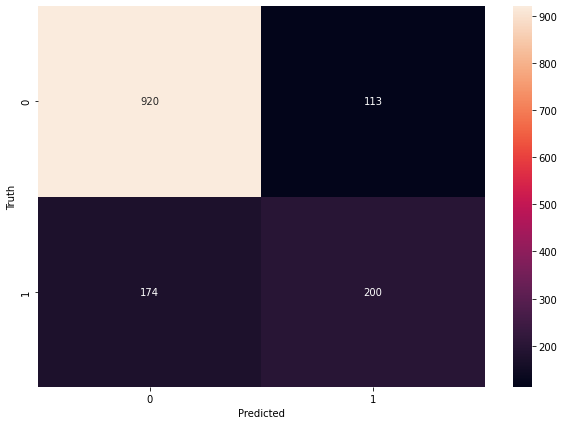

In [82]:
import seaborn as sn

cm = tf.math.confusion_matrix(labels=y_test, predictions=y_pred)
plt.figure(figsize= (10,7))
sn.heatmap(cm, annot =True, fmt='d')
plt.xlabel('Predicted')
plt.ylabel('Truth')

In [90]:

round((920+200)/(920+200+174+113),2)

0.8

In [91]:
#precision class 0
920/(920+174)

0.8409506398537477

In [92]:
#precision class 1
200/(200+174)

0.5347593582887701

In [96]:
#Recall 0
round(920/(920+113),2)

0.89

In [97]:
#Recall 0
round(200/(200+174),2)

0.53